In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils as utils
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [15]:
#Hyper-parameters
num_epoch=5
batch_size=64
learning_rate=0.001
num_classes=10
input_size=784

In [17]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
#training_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
#testing_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_dataset = datasets.MNIST(root="dataset/", download=True, train=True, transform=transforms.ToTensor())
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root="dataset/", download=True, train=False, transform=transforms.ToTensor())
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [19]:
#Device Configuration
device = "cuda" if torch.cuda.is_available() else "cpu"

In [21]:
#Defining CNN class
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # First convolutional layer
        self.conv1 = nn.Conv2d(1,8, kernel_size=3, stride=1, padding=1)
        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Second convolutional layer
        self.conv2 = nn.Conv2d(8,16, kernel_size=3, stride=1, padding=1)
        # Fully connected layer
        self.fc1 = nn.Linear(16 * 7 * 7, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Apply first convolution and ReLU activation
        x = self.pool(x)           # Apply max pooling
        x = F.relu(self.conv2(x))  # Apply second convolution and ReLU activation
        x = self.pool(x)           # Apply max pooling
        x = x.reshape(x.shape[0], -1)  # Flatten the tensor
        x = self.fc1(x)            # Apply fully connected layer
        return x

In [23]:
#Model Defination
model = CNN().to(device)

In [25]:
#Defining loss and optimizer function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [27]:
#Training the network

def training_model(loader):
    step_loss=[]
    epoch_loss=[]
    accuracy=[]
    epoch_accuracy=[]
    correct=0
    if loader.dataset.train:
        print("Model training on training data")
    else:
        print("Model training on test data")
    
    for epoch in range(num_epoch):   
        print(f"Epoch [{epoch + 1}/{num_epoch}]")
        for batch_index, (data, targets) in enumerate(tqdm(loader)):
            # Move data to device
            data = data.to(device)
            targets = targets.to(device)

            # Forward pass
            scores = model(data)
            loss = criterion(scores, targets)
            _,predict=scores.max(1)
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()

            # Optimization step
            optimizer.step()

            correct += (predict == targets).sum()

            #Calculate Loss
            step_loss.append(loss.item())

            #Calculate Accuracy
            accuracy = (correct / (predict.size(0)))
            
        epoch_loss.append(np.array(step_loss).mean())
        epoch_accuracy.append(np.array(accuracy))
        print(f"Mean Loss={epoch_loss}")
        print(f"Accuracy={epoch_accuracy}")
        
    return epoch_loss,epoch_accuracy


training_loss=[]
validation_loss=[]
training_accuracy=[]
validation_accuracy=[]

training_loss,training_accuracy=training_model(train_loader)
validation_loss,validation_accuracy=training_model(test_loader)

Model training on training data
Epoch [1/5]


100%|██████████| 938/938 [01:25<00:00, 10.99it/s]


Mean Loss=[0.3262177273504007]
Accuracy=[array(1703.1562, dtype=float32)]
Epoch [2/5]


100%|██████████| 938/938 [01:14<00:00, 12.64it/s]


Mean Loss=[0.3262177273504007, 0.21289200810387907]
Accuracy=[array(1703.1562, dtype=float32), array(3521.1562, dtype=float32)]
Epoch [3/5]


100%|██████████| 938/938 [01:08<00:00, 13.79it/s]


Mean Loss=[0.3262177273504007, 0.21289200810387907, 0.16666705817520003]
Accuracy=[array(1703.1562, dtype=float32), array(3521.1562, dtype=float32), array(5353.9062, dtype=float32)]
Epoch [4/5]


100%|██████████| 938/938 [00:40<00:00, 23.17it/s]


Mean Loss=[0.3262177273504007, 0.21289200810387907, 0.16666705817520003, 0.1400097592290479]
Accuracy=[array(1703.1562, dtype=float32), array(3521.1562, dtype=float32), array(5353.9062, dtype=float32), array(7194.75, dtype=float32)]
Epoch [5/5]


100%|██████████| 938/938 [00:30<00:00, 31.18it/s]


Mean Loss=[0.3262177273504007, 0.21289200810387907, 0.16666705817520003, 0.1400097592290479, 0.1221560765598426]
Accuracy=[array(1703.1562, dtype=float32), array(3521.1562, dtype=float32), array(5353.9062, dtype=float32), array(7194.75, dtype=float32), array(9041.156, dtype=float32)]
Model training on test data
Epoch [1/5]


100%|██████████| 157/157 [00:06<00:00, 24.06it/s]


Mean Loss=[0.0424859004238306]
Accuracy=[array(615.875, dtype=float32)]
Epoch [2/5]


100%|██████████| 157/157 [00:05<00:00, 27.92it/s]


Mean Loss=[0.0424859004238306, 0.036852723304338]
Accuracy=[array(615.875, dtype=float32), array(1234.25, dtype=float32)]
Epoch [3/5]


100%|██████████| 157/157 [00:04<00:00, 37.06it/s]


Mean Loss=[0.0424859004238306, 0.036852723304338, 0.0329720021348848]
Accuracy=[array(615.875, dtype=float32), array(1234.25, dtype=float32), array(1854.375, dtype=float32)]
Epoch [4/5]


100%|██████████| 157/157 [00:05<00:00, 29.14it/s]


Mean Loss=[0.0424859004238306, 0.036852723304338, 0.0329720021348848, 0.030247878987222736]
Accuracy=[array(615.875, dtype=float32), array(1234.25, dtype=float32), array(1854.375, dtype=float32), array(2475.25, dtype=float32)]
Epoch [5/5]


100%|██████████| 157/157 [00:05<00:00, 29.99it/s]

Mean Loss=[0.0424859004238306, 0.036852723304338, 0.0329720021348848, 0.030247878987222736, 0.027731324270720576]
Accuracy=[array(615.875, dtype=float32), array(1234.25, dtype=float32), array(1854.375, dtype=float32), array(2475.25, dtype=float32), array(3096.625, dtype=float32)]


In [30]:
#Checking accuracy of the model
def check_accuracy(loader, model):
    if loader.dataset.train:
        print("Checking accuracy on training data")
    else:
        print("Checking accuracy on test data")

    num_correct = 0
    num_samples = 0
    model.eval()  # Set the model to evaluation mode
    
    with torch.no_grad():  # Disable gradient calculation
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)

            # Forward pass: compute the model output
            scores = model(x)
            _, predictions = scores.max(1)  # Get the index of the max log-probability
            num_correct += (predictions == y).sum()  # Count correct predictions
            num_samples += predictions.size(0)  # Count total samples

        # Calculate accuracy
        accuracy = float(num_correct) / float(num_samples) * 100
        print(f"Got {num_correct}/{num_samples} with accuracy {accuracy:.2f}%")

    model.train()  # Set the model back to training mode

# Final accuracy check on training and test sets
check_accuracy(train_loader, model)
check_accuracy(test_loader, model)

Checking accuracy on training data
Got 59108/60000 with accuracy 98.51%
Checking accuracy on test data
Got 9971/10000 with accuracy 99.71%


<function matplotlib.pyplot.show(close=None, block=None)>

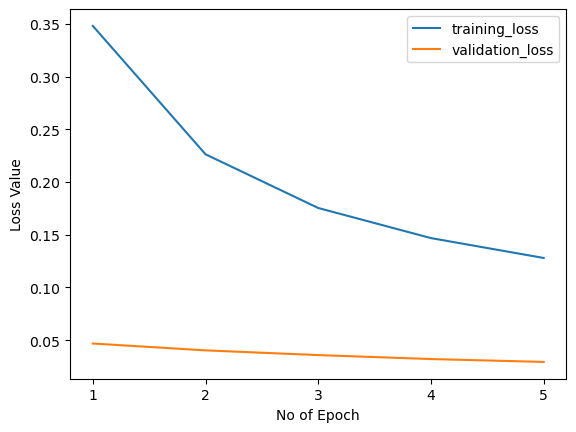

In [183]:
#plotting training and validation Loss function
plt.plot(training_loss, label='training_loss')
plt.plot(validation_loss,label='validation_loss')
plt.xlabel("No of Epoch")
plt.ylabel("Loss Value")
plt.xticks(range(5),[1,2,3,4,5])
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

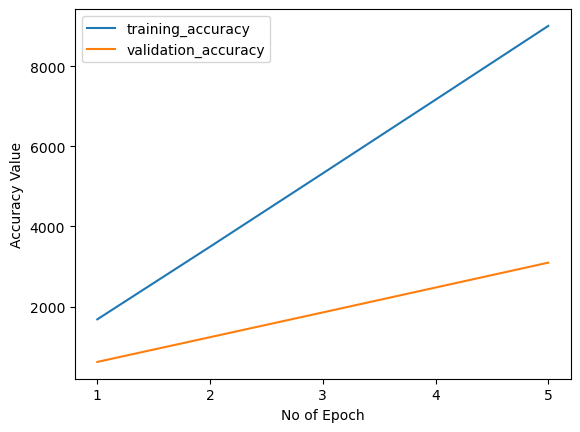

In [185]:
#plotting training and validation accuracy
plt.plot(training_accuracy, label='training_accuracy')
plt.plot(validation_accuracy,label='validation_accuracy')
plt.xlabel("No of Epoch")
plt.ylabel("Accuracy Value")
plt.xticks(range(5),[1,2,3,4,5])
plt.legend()
plt.show